# Titanic Dataset Survival Prediction

In this project, we analyze the Titanic dataset from Kaggle to predict passenger survival based on various features. We perform exploratory data analysis (EDA), data preprocessing, and apply multiple machine learning models to predict survival. The goal is to build a model that accurately predicts which passengers survived the Titanic disaster.


In [80]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading and Initial Overview

Loading the Titanic dataset and examining its structure to understand the available features and target variable.


In [81]:
#loading the dataset
train = pd.read_csv('Titanic(Train).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Basic Data Information
 Checking data types, missing values, and summary statistics to identify potential preprocessing needs

In [82]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
# Viewing unique values in each categorical feature to understand data distribution
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Exploratory Data Analysis (EDA)
-
Analyzing patterns in the data using visualizations to understand how various features relate to passenger survival.


Text(0.5, 1.0, 'Distribution of Survival')

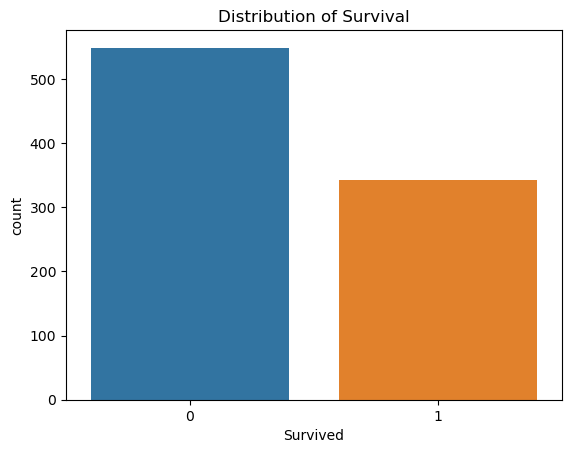

In [85]:
# Survival Distribution
# Plotting the distribution of the target variable `Survived` to understand the balance of the classes
sns.countplot(data=train, x='Survived')
plt.title("Distribution of Survival")

<Axes: xlabel='Sex', ylabel='Survived'>

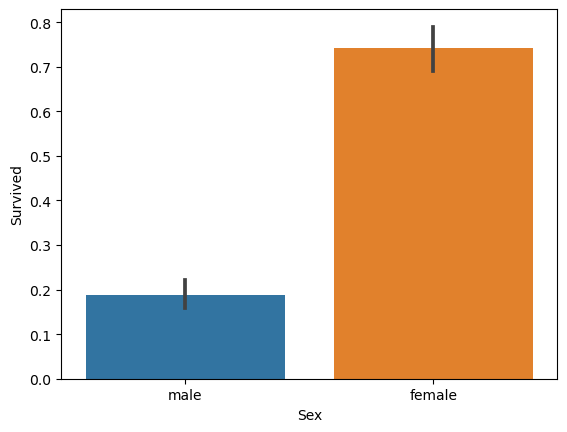

In [86]:
# analyzing survival by gender
sns.barplot(data=train,x='Sex',y='Survived')

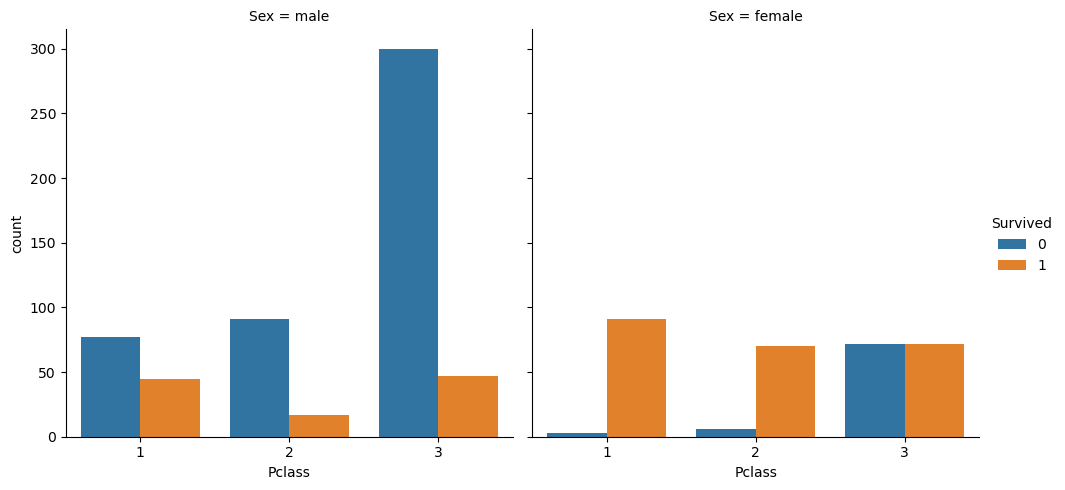

In [87]:
# analyzing survival rates by class and gender
# Using a stacked bar plot to analyze survival rates by class and gender to check if passenger class influenced survival chances
sns.catplot(data=train, x='Pclass', col='Sex',hue='Survived', kind='count')

### Data Preprocessing

Handling missing values, encoding categorical features, and preparing the dataset for machine learning.


In [88]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
# filling the missing values of the numerical column with their mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [90]:
# using mode to fill the null values in (Embarked) column
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [91]:
# dropping unecessary columns
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [92]:
#encoding the categorical columns such as (Sex) and (Embarked)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
# using  OHE for the (Embarked) since it has nomial data
train = pd.get_dummies(data=train, columns=['Embarked'], drop_first=True)

### Correlation Analysis

Examining the correlation between numerical features to understand their relationships and detect any multicollinearity issues.


<Axes: >

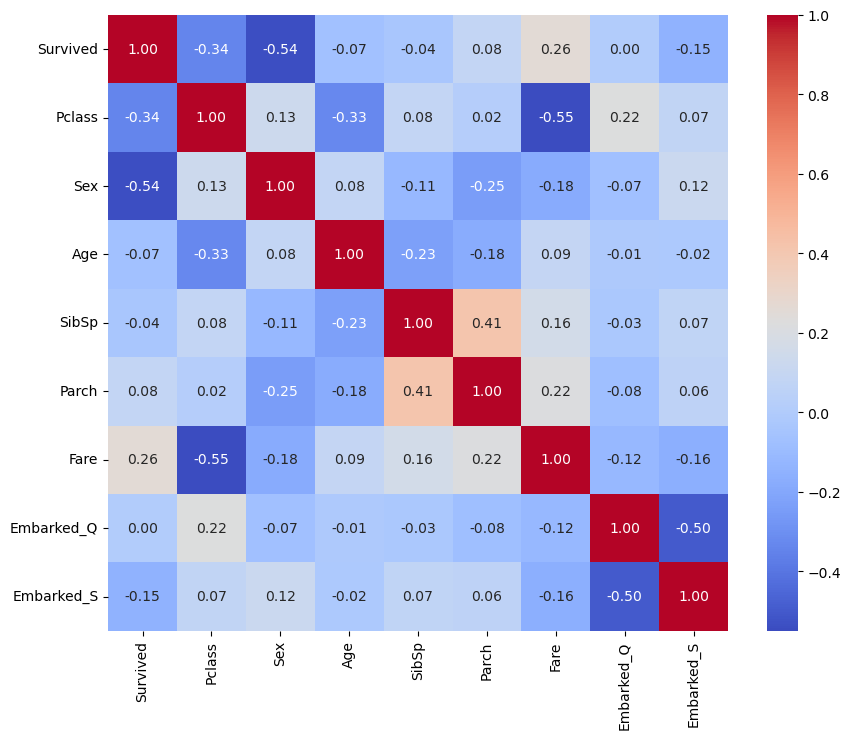

In [93]:
# Correlation Heatmap
# Generating a heatmap to visualize the correlation between numerical features and the target variable
corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

## Model Training and Evaluation

Splitting the data, defining the model training function, and using it to train and evaluate multiple models for survival prediction.


In [94]:
# data split into training and testing set
X = train.drop(columns=['Survived'])
y = train['Survived']

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Model training function
# Function to train, predict, and evaluate the model's accuracy and performance
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    scaler =  StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    accuracy = accuracy_score(y_test, pred)
    
    print("MODEL: ",model)
    print("Accuracy score: ", accuracy)
    print("CV SCORE: ", cv_score)
    print("\n")

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
# Training and Evaluating Models
# List of models to be trained and evaluated

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier()]

In [97]:
for mod in models:
    classify(mod, X, y)

MODEL:  LogisticRegression()
Accuracy score:  0.7937219730941704
CV SCORE:  0.791256041679744


MODEL:  DecisionTreeClassifier()
Accuracy score:  0.7488789237668162
CV SCORE:  0.7733350072186302


MODEL:  RandomForestClassifier()
Accuracy score:  0.7668161434977578
CV SCORE:  0.815956311593748


MODEL:  ExtraTreesClassifier()
Accuracy score:  0.7668161434977578
CV SCORE:  0.7935095097608436




## Conclusion

This analysis of the Titanic dataset explored various machine learning models to predict passenger survival, focusing on key features such as passenger class, gender, age, and embarked location. By training multiple models, including Logistic Regression, Decision Tree, Random Forest, and Extra Trees, I was able to assess the predictive power of each. The Random Forest model provided one of the best performances, with a balance of accuracy and cross-validation scores.

While this project was completed without the Kaggle test dataset, the model remains fully functional and capable of generating predictions based on new data. This study not only highlights the importance of feature engineering and preprocessing but also serves as a foundation for future projects involving binary classification in machine learning.
